In [64]:
# prompt: !pip install tensorflow-gpu

!pip install tensorflow-gpu==2.8


In [65]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [66]:
 #import some basic libraries
 import numpy as np
 import matplotlib.pyplot as plt
 import pandas as pd

In [67]:
datasets = pd.read_csv('/content/Churn_Modelling.csv')

In [68]:
datasets.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [69]:
#divide the datasets into independent and dependent feature
x=datasets.iloc[:,3:13]
y=datasets.iloc[:,13]
x.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [70]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [71]:
#feature Engineering
geography=pd.get_dummies(x['Geography'],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [72]:
#conccatenate these variable with dataframe
x = x.drop(['Geography','Gender'],axis=1)

In [73]:
x = pd.concat([x,geography,gender],axis=1)
x['Germany'] = x['Germany'].astype(int)
x['Spain'] = x['Spain'].astype(int)
x['Male'] = x['Male'].astype(int)

In [74]:
#splitting the dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [75]:
x_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
9394,597,35,8,131101.04,1,1,1,192852.67,1,0,0
898,523,40,2,102967.41,1,1,0,128702.10,0,0,0
2398,706,42,8,95386.82,1,1,1,75732.25,0,1,0
5906,788,32,4,112079.58,1,0,0,89368.59,0,0,1
2343,706,38,5,163034.82,2,1,1,135662.17,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1037,625,24,1,0.00,2,1,1,180969.55,0,0,0
2899,586,35,7,0.00,2,1,0,70760.69,0,0,0
9549,578,36,1,157267.95,2,1,0,141533.19,0,1,1
2740,650,34,4,142393.11,1,1,1,11276.48,1,0,1


In [76]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [77]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [78]:
print(x_test.shape,x_train.shape)

(2000, 11) (8000, 11)


In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [80]:
#lets initialize the ANN
clasifier = Sequential()


In [81]:
#Adding the input Layer
clasifier.add(Dense(units=11,activation='relu'))

In [82]:
#adding first hidden Layer
clasifier.add(Dense(units=7,activation='relu'))

#adding second hidden layer
clasifier.add(Dense(units=6,activation='relu'))


In [83]:
#output layer
clasifier.add(Dense(units=1,activation='sigmoid'))

In [84]:
clasifier.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [85]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [86]:
#early Stoping keras

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,

)

In [87]:
model_history=clasifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 4ms/step - loss: 0.5124 - accuracy: 0.7904 - val_loss: 0.4539 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4347 - accuracy: 0.7962 - val_loss: 0.4302 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 5s 9ms/step - loss: 0.4151 - accuracy: 0.7962 - val_loss: 0.4160 - val_accuracy: 0.7955
Epoch 4/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.4001 - accuracy: 0.8091 - val_loss: 0.4039 - val_accuracy: 0.8292
Epoch 5/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3862 - accuracy: 0.8412 - val_loss: 0.3939 - val_accuracy: 0.8326
Epoch 6/1000
536/536 [==============================] - 6s 11ms/step - loss: 0.3747 - accuracy: 0.8515 - val_loss: 0.3885 - val_accuracy: 0.8402
Epoch 7/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3672 - accuracy: 0.8548 - val_loss: 0.3836 - val_accuracy

In [88]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [89]:
import matplotlib.pyplot as plt

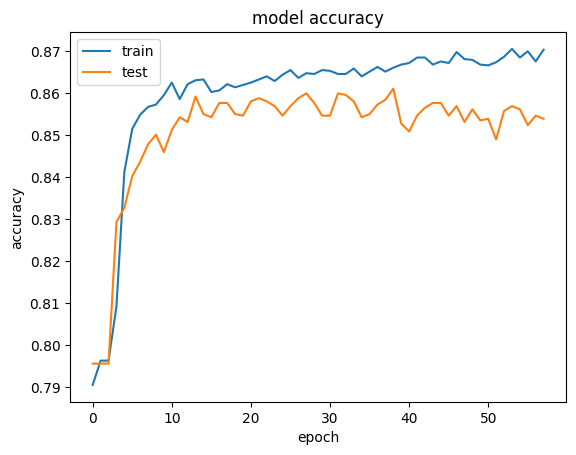

In [90]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

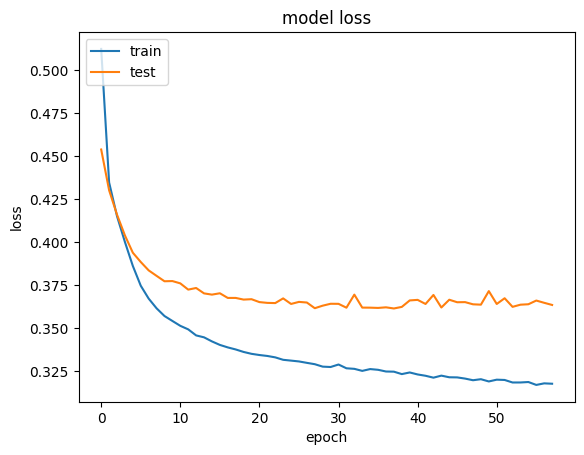

In [91]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [92]:
y_pred=clasifier.predict(x_test)
y_pred=(y_pred>=0.5)

In [93]:
#make confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1504,   91],
       [ 200,  205]])

In [94]:
#cal the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.8545

In [95]:
#get the weights
clasifier.get_weights()

[array([[-6.54839948e-02, -3.27087730e-01,  2.92211682e-01,
          4.86527532e-01, -9.73140001e-02, -2.36741349e-01,
          5.04783630e-01,  7.69220442e-02,  4.54200715e-01,
          6.62154794e-01, -8.52120668e-02],
        [-3.02894086e-01, -7.82541990e-01, -5.44567704e-01,
         -9.18421030e-01,  5.95494688e-01,  4.69297767e-02,
          2.13997111e-01,  1.24033660e-01,  1.17019808e+00,
         -6.99147761e-01, -4.42930937e-01],
        [ 6.70379400e-02, -1.85910746e-01,  2.59293139e-01,
         -1.93016395e-01,  5.76790981e-03,  1.32835448e-01,
         -2.24091634e-01,  2.33198069e-02,  6.13732189e-02,
          1.15654103e-01, -1.65738426e-02],
        [-2.00956553e-01,  3.53081971e-01, -2.04261020e-01,
         -3.09023619e-01, -5.63565969e-01,  6.86560869e-02,
          6.26142383e-01,  3.85475934e-01, -1.03797624e-02,
          5.45821965e-01, -5.65696239e-01],
        [ 4.93323475e-01, -3.35284360e-02, -2.39649355e-01,
          1.95120737e-01, -1.00689209e+00,  